<a href="https://colab.research.google.com/github/lionelalexandre/4TPU271/blob/main/S2_TD1_python_notebook_en_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue"> <center>Student / TD1 : 4TPU279U $-$ Bachelor 1st year $-$ spring 2023</center></span>
# <center><span style="color:red">*Hervé Schmit-Veiler*</span></center>
# <hr style="border:1px solid black"><center>  Devoir Maison : trajectoire d'un ballon de rugby </center><hr style="border:1px solid black">
</br>

Déposer ce fichier **notebook** complété (ou sa version Python/Spyder) ainsi que le fichier de données sur 
[Moodle](https://moodle1.u-bordeaux.fr/course/view.php?id=12271) via la page consacrée à votre demi-groupe.


Renommer le fichier suivant : 
- `DM_NomPrenom_S2.ipynb` pour un fichier *jupyter-notebook*

ou 

- `DM_NomPrenom_S2.py` pour un fichier *python* pur

et

- `trajectoire_NomPrenom.txt` pour le fichier de données

<div class="alert alert-block alert-warning">
<b>ATTENTION :</b> Abolir totalement l’emploi des espaces, lettres accentuées et autres symboles
dans le nom du fichier !
</div>

**Les points suivants seront pris en compte pour l'évaluation :**
- respect des consignes
- qualité des données extraites *via* Tracker
- mise en forme des figures (légendes, unités, titre etc...)
- clarté des programmes et mise en page

### <hr style="border:1px solid black">  Tracker  <hr style="border:1px solid black">

> Créer avec Tracker un echantillonnage de la vidéo. On pourra utiliser la hauteur de la barre transversale (3 mètres) pour la calibration. Sauvegarder le fichier de données au (format `txt` par défaut) sous le nom :
`trajectoire_NomPrenom_S2.txt`

### <hr style="border:1px solid black"> Extraction des données et représentation <hr style="border:1px solid black">

> Extraire les données et stocker le temps dans une liste `t` et les coordonnées dans `x` et `y`. Puis convertir les listes en tableau numpy.

In [17]:
import numpy as np

t, x, y = np.genfromtxt("trajectoire_SchmitVeilerHerve.txt", dtype=float, skip_header=2, delimiter="	", unpack=True, usecols=(0,1,2))
print(t, "\nnumber of data points =", len(t))
print(type(t))

tmin = t[0]
for i in range(len(t)):
    t[i] -= tmin

[4.2   4.233 4.267 4.3   4.333 4.367 4.4   4.433 4.467 4.5   4.533 4.567
 4.6   4.633 4.667 4.7   4.733 4.767 4.8   4.833 4.867 4.9   4.933 4.967
 5.    5.033 5.067 5.1   5.133 5.167 5.2   5.233 5.267 5.3   5.333 5.367
 5.4   5.433 5.467 5.5   5.533 5.567 5.6   5.633 5.667 5.7   5.733 5.767
 5.8   5.833 5.867 5.9   5.933 5.967 6.    6.033 6.067 6.1   6.133 6.167
 6.2   6.233 6.267 6.3   6.333 6.367 6.4   6.433 6.467 6.5   6.533 6.567
 6.6   6.633 6.667 6.7   6.733 6.767 6.8   6.833 6.867 6.9   6.933 6.967
 7.    7.033 7.067 7.1   7.133 7.167 7.2   7.233 7.267 7.3   7.333] 
number of data points = 95
<class 'numpy.ndarray'>


> Tracer la loi horaire : $x(t)$

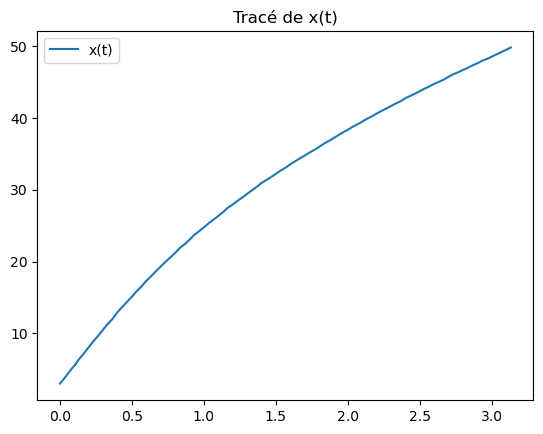

In [18]:
import matplotlib.pyplot as plt

plt.plot(t, x, label="x(t)")
plt.legend()
plt.title("Tracé de x(t)")
plt.show()

> Tracer la loi horaire : $y(t)$

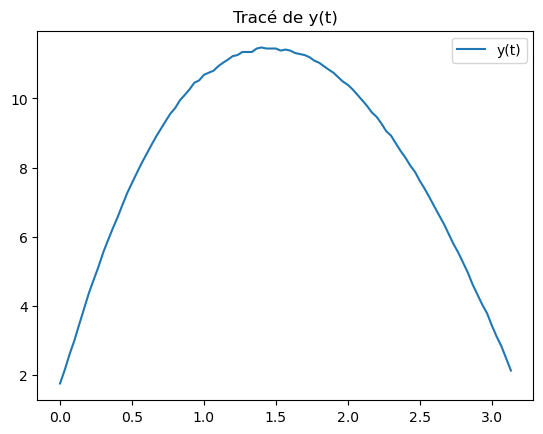

In [19]:
plt.plot(t, y, label="y(t)")
plt.legend()
plt.title("Tracé de y(t)")
plt.show()

> Tracer la trajectoire du ballon : $y(t)$ en fonction de $x(t)$

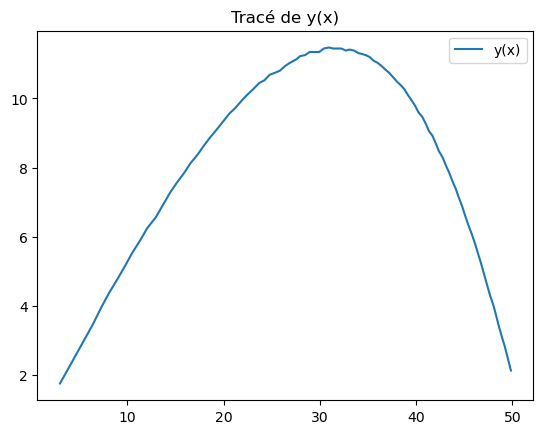

In [20]:
plt.plot(x, y, label="y(x)")
plt.legend()
plt.title("Tracé de y(x)")
plt.show()

On voit que la trajectoire n'est pas symmetrique par rapport à son sommet.

### <hr style="border:1px solid black"> Traitement des données<hr style="border:1px solid black">

> Calcul des composantes *horizontale* $(v_x)$ et *verticale* $(v_y)$ de la vitesse du ballon en utilisant la méthode des **différences finies centrales**. On créera 2 listes `vx`et `vy` pour stocker les valeurs. Quelle est la taille du vecteur `vx` et de `vy` ? Faire afficher le résultat.

In [21]:
# central finite diff. to approximate gradient
def cfd_grad(T, X):
    dX = np.zeros(len(X)-2)
    for i in range(len(dX)):
        dX[i] = (X[i+2]-X[i])/(T[i+2]-T[i])
    return dX

# progressive finite diff.
def fd_grad(T, X):
    dX = np.zeros(len(X))
    for i in range(len(dX)):
        if i == len(dX)-1:
            dX[i] = (X[i]-X[i-1])/(T[i]-T[i-1])
            continue
        dX[i] = (X[i+1]-X[i])/(T[i+1]-T[i])
    return dX

In [22]:
vx = cfd_grad(t, x)
vy = cfd_grad(t, y)

v_norm = np.sqrt(vx**2 + vy**2)

N = len(vx)
print('number of data points = ', N)



number of data points =  93


> Eliminer la première et la dernière valeur du tableau `t` de telle sorte que la taille de `t` soit
identique à celles de `vx` et `vy`. On appellera ce nouveau vecteur `tv`.


In [23]:
# starts at element 1 and stops on the last element without including it
tv = t[1:-1]

N = len(tv)
print('number of data points = ', N)

number of data points =  93


> Tracer les composantes de la vitesse du ballon en fonction du temps, ie. $v_x(t)$ et $v_y(t_v)$

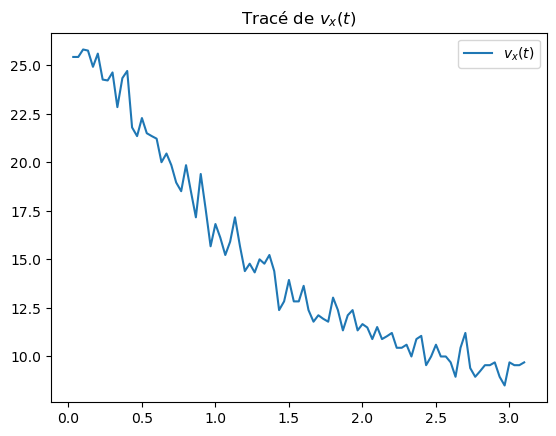

In [24]:
plt.plot(tv, vx, label="$v_x(t)$")
plt.legend()
plt.title("Tracé de $v_x(t)$")
plt.show()

> Tracer la composante horizontale de la vitesse du ballon en échelle semi-logarithmique, ie. $\log(v_x)$ en fonction de $t_v$

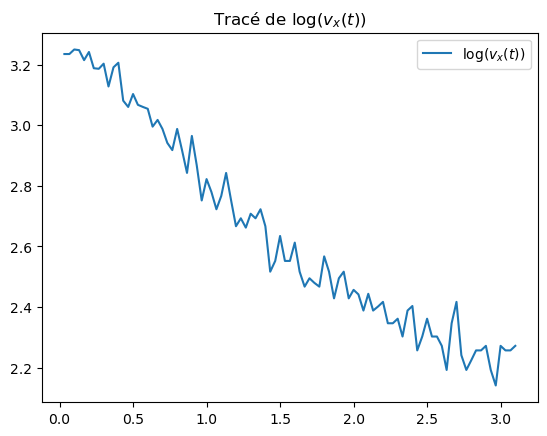

In [25]:
from numpy import log # logarithme naturel = "ln"

log_vx = np.log(vx)
plt.plot(tv, log_vx, label="$\log(v_x(t))$")
plt.legend()
plt.title("Tracé de $\log(v_x(t))$")
plt.show()

### <hr style="border:1px solid black"> Régression linéaire et temps caractéristiques <hr style="border:1px solid black">

- La composante horizontale de la vitesse doit vérifier la relation suivante :
$$v_x(t) = v^0_{x}\ \exp\left(-\frac{t}{\tau}\right)$$
avec $v^0_{x}=v_x(t=0)\cos(\alpha)$ où $\alpha$ est l'angle de tir et $v_x(t=0)$ la vitesse initiale suivant $(Ox)$. Le paramètre $\tau=m/\mu$ correspond au temps caractéristique de décroissance de la vitesse.

- La composante verticale de la vitesse doit vérifier la relation suivante :
$$v_y(t) = v^0_{y}\ \exp\left(-\frac{t}{\tau}\right)+v_{\mathrm{lim}}\left(1-\exp\left(-\frac{t}{\tau}\right)\right)$$
avec $v^0_{y}=v_y(t=0)\sin(\alpha)$ et $v_{\mathrm{lim}}=\tau g =\lim_{t\rightarrow\infty}v_y(t)$ représente l'asymptote verticale de la vitesse.

> A l'aide d'un ajustement linéaire de $\ln(v_x)$ en fonction de $t$, déduire la valeur numérique de $\tau$ :

> $$\ln(v_x) = \ln(v_x^0) - \frac{t}{\tau}=a_0+a_1\ t$$

In [26]:
from scipy.optimize import curve_fit
from numpy import ones, sqrt

# a0 = ln(vx(0))
# a1 = -1/tau
def lin_model(t, a0, a1):
    return a0 + a1*t

[a0, a1], pvar = curve_fit(f=lin_model, xdata=tv, ydata=log_vx)

print(a0, a1)
tau = -1/a1
print("𝛕 =", tau)

3.214078874266607 -0.36224514084549586
𝛕 = 2.7605615293167403


> Tracer la droite  de regression 

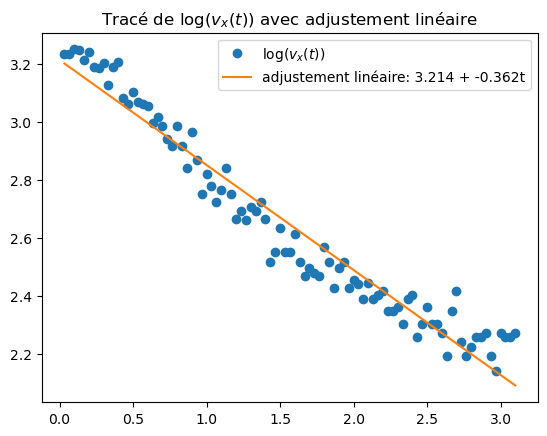

<Figure size 640x480 with 0 Axes>

In [27]:
from numpy import linspace, arange

tv_model = np.linspace(min(tv), max(tv), 1000)
vx_model = lin_model(tv_model, a0, a1)

plt.plot(tv, log_vx, linestyle='', marker='o', label="$\log(v_x(t))$")
plt.plot(tv_model, vx_model, label=f"adjustement linéaire: {a0:.3f} + {a1:.3f}t")
plt.legend()
plt.title("Tracé de $\log(v_x(t))$ avec adjustement linéaire")
plt.show()
plt.savefig('figs/figure_x.png', dpi=300, format='png', transparent=True)

> Tracer la partie non constante de la composante verticale de la vitesse du ballon : $v_{\mathrm{cst}}=v_y(t)-v_{\mathrm{lim}}=v_y(t)+g\tau$. On créera un tableau `vy_cst` à cet effet.

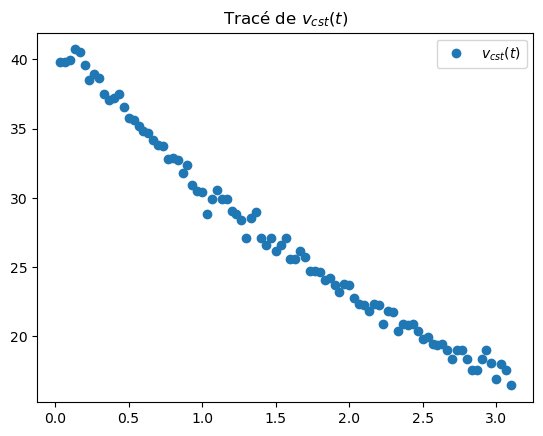

In [28]:
from scipy.constants import g

vy_cst = vy + g*tau
plt.plot(tv, vy_cst, linestyle='', marker='o', label="$v_{cst}(t)$")
plt.legend()
plt.title("Tracé de $v_{cst}(t)$")
plt.show()

> Tracer la partie non constante de la composante verticale de la vitesse du ballon en échelle semi-logarithmique, ie. $\log(v_y(t) - v_\mathrm{lim})$ en fonction de $t$

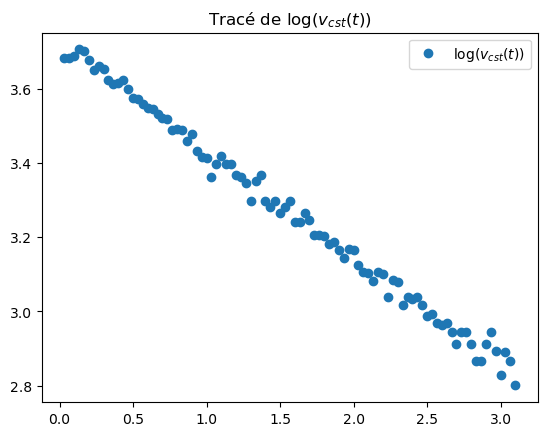

In [29]:
log_vy_cst = np.log(vy_cst)
plt.plot(tv, log_vy_cst, linestyle='', marker='o', label="$\log(v_{cst}(t))$")
plt.legend()
plt.title("Tracé de $\log(v_{cst}(t))$")
plt.show()

> A l'aide d'un ajustement linéaire de $\ln(v_y(t) - v_\mathrm{lim})$ en fonction de $t$, déduire la valeur numérique de $\tau$ :

> $$\ln\left(v_y(t) - v_\mathrm{lim}\right) = \ln\left(v_x^0-v_\mathrm{lim}\right) - \frac{t}{\tau}=a_0+a_1\ t$$

In [30]:
from scipy.optimize import curve_fit
from numpy import ones, sqrt

[a2, a3], pvar = curve_fit(f=lin_model, xdata=tv, ydata=log_vy_cst)

print(a2, a3)
tau2 = -1/a3
print("𝛕 =", tau2)

3.721096827389121 -0.28843072160840455
𝛕 = 3.467037056328819


bizarre...

> Tracer la droite  de regression 

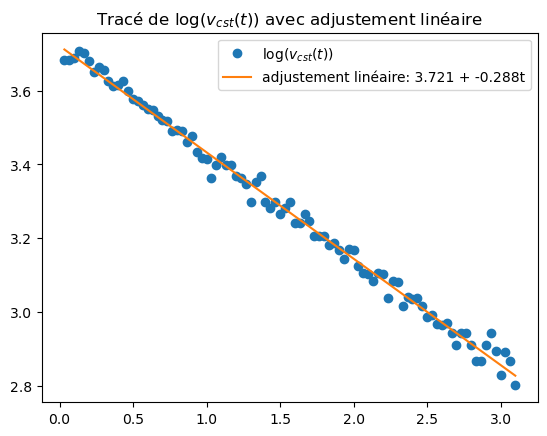

<Figure size 640x480 with 0 Axes>

In [31]:
from numpy import linspace, arange

vcst_model = lin_model(tv_model, a2, a3)

plt.plot(tv, log_vy_cst, linestyle='', marker='o', label="$\log(v_{cst}(t))$")
plt.plot(tv_model, vcst_model, label=f"adjustement linéaire: {a2:.3f} + {a3:.3f}t")
plt.legend()
plt.title("Tracé de $\log(v_{cst}(t))$ avec adjustement linéaire")
plt.show()
plt.savefig('figs/figure_2.png', dpi=300, format='png', transparent=True)

<hr style="border:1px solid grey">

### <hr style="border:1px solid black"> Pour aller plus loin <hr style="border:1px solid black">

> Tracer l'hodographe $(v_x,v_y)$

Text(0, 0.5, '$v_y$ (m/s)')

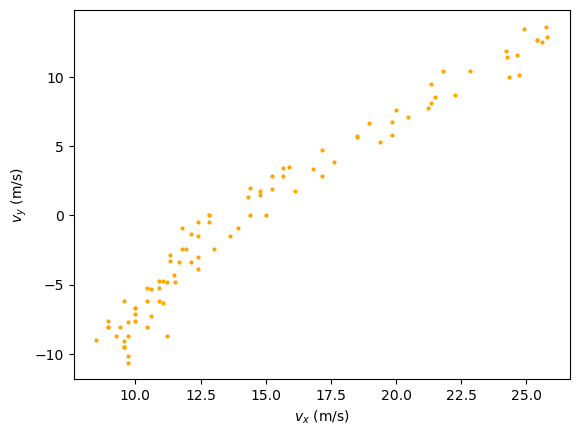

In [32]:
import matplotlib.pyplot as plt

plt.plot(vx,vy,linestyle='', marker='o', markersize=2, color='orange', linewidth=1.5, label='$v_x(t)$')
plt.xlabel('$v_x$ (m/s)')
plt.ylabel('$v_y$ (m/s)')

Ce dernier hodographe devrait être une droite, de même que la loi $\ln (v_x(t))$ tracée plus haut.
Dans le cas d'un ballon de rugby, la force de frottement est en fait une force de trainée en $-v^2$, ie. $\vec f=-\rho S C_x |v| \vec v$ avec $\rho$ densité de l'atmosphère, $S$ surface en contact et $C_x$ le coefficient de trainée. 